# RNN

In [5]:
import keras.layers
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
max_features = 20000
max_len = 300
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 300), (25000, 300))

In [7]:
model_layers = [
    Embedding(max_features, 16, mask_zero=True),
    SimpleRNN(32, input_shape=(max_features,max_len), activation="relu", kernel_regularizer="l2"),
    keras.layers.Dropout(0.1),
    Dense(1, activation='sigmoid'),
]
model = Sequential(model_layers)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321,601
Trainable params: 321,601
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 520s 652ms/step - loss: 0.6507 - accuracy: 0.6499 - val_loss: 0.4282 - val_accuracy: 0.8240
Epoch 2/5
782/782 [==============================] - 125s 160ms/step - loss: 0.4122 - accuracy: 0.8396 - val_loss: 0.3505 - val_accuracy: 0.8566
Epoch 3/5
782/782 [==============================] - 62s 79ms/step - loss: 0.2485 - accuracy: 0.9120 - val_loss: 0.3542 - val_accuracy: 0.8640
Epoch 4/5
782/782 [==============================] - 63s 80ms/step - loss: 0.1914 - accuracy: 0.9384 - val_loss: 0.4033 - val_accuracy: 0.8586
Epoch 5/5
782/782 [==============================] - 61s 78ms/step - loss: 0.1720 - accuracy: 0.9457 - val_loss: 0.5177 - val_accuracy: 0.7983


In [9]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.650711,0.64988,0.428194,0.82396
1,0.412216,0.83956,0.350511,0.85664
2,0.248482,0.91196,0.354197,0.86400
3,0.191427,0.93836,0.403274,0.85856
4,0.172018,0.94568,0.517713,0.79828


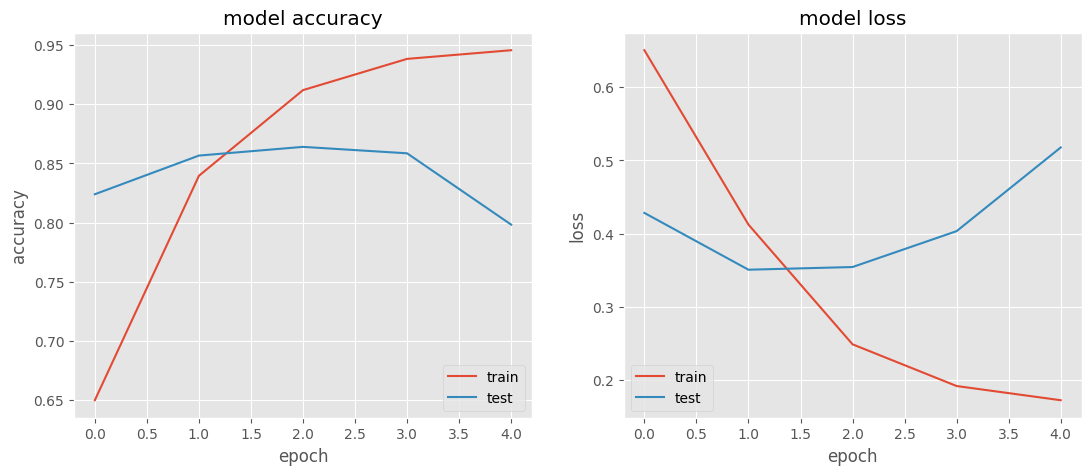

In [10]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

plt.sca(axis[0])
# plt.ylim(0, 1)
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

plt.sca(axis[1])
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower left');